We know that initial layers learn about primitive features, and later ones learn the complex features.

We can
   - Extract features (at the end of whole network)
   - Extract features from some intermediary layer of the network

For this can stop at the intermediate layers, and see what is the model is looking at that stage.

We will specifically look at two things for an image
  1. filters extracted by model at that stage
  2. feature map generated by that layer



In [1]:
from keras.applications import VGG16

model = VGG16()
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

# Extract Filters

In [5]:
# Since layer's name contains 'conv' string if its conv layer,
# We can extract the filters(weights of the) of such layers

for i in range(len(model.layers)):
  # model.layers is a list of layer's

  if "conv" not in model.layers[i].name:
    continue
  # Get weights of the layer with name(filter and bias both considered weights)
  filters, biases = model.layers[i].get_weights()
  print( "layer",i, " : ", model.layers[i].name, filters.shape)

layer 1  :  block1_conv1 (3, 3, 3, 64)
layer 2  :  block1_conv2 (3, 3, 64, 64)
layer 4  :  block2_conv1 (3, 3, 64, 128)
layer 5  :  block2_conv2 (3, 3, 128, 128)
layer 7  :  block3_conv1 (3, 3, 128, 256)
layer 8  :  block3_conv2 (3, 3, 256, 256)
layer 9  :  block3_conv3 (3, 3, 256, 256)
layer 11  :  block4_conv1 (3, 3, 256, 512)
layer 12  :  block4_conv2 (3, 3, 512, 512)
layer 13  :  block4_conv3 (3, 3, 512, 512)
layer 15  :  block5_conv1 (3, 3, 512, 512)
layer 16  :  block5_conv2 (3, 3, 512, 512)
layer 17  :  block5_conv3 (3, 3, 512, 512)


In [6]:
# Lets look at the weights of 1st conv layer (ie layer[1])
filters, biases = model.layers[1].get_weights()

# It will be easier to visualize if we normalize (0 - 1)
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

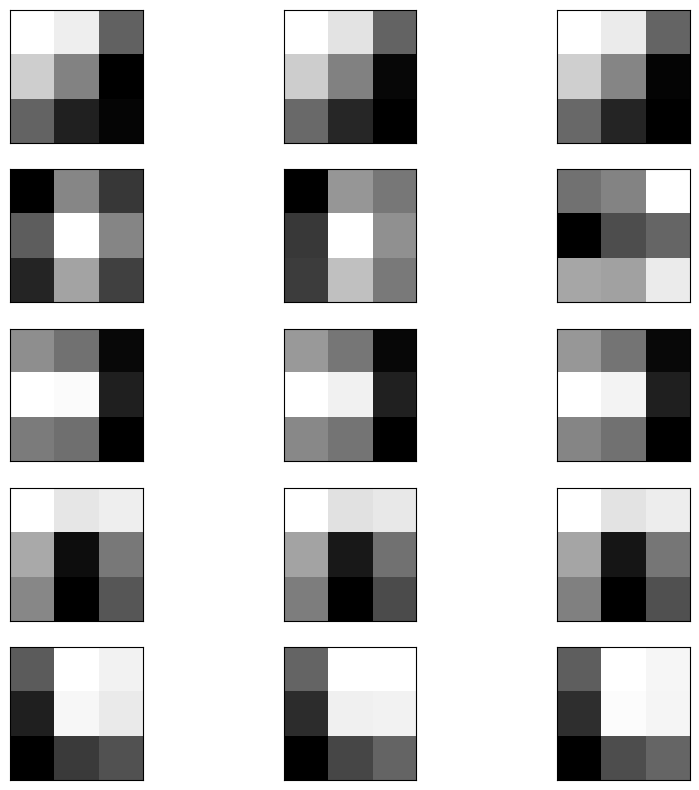

In [8]:
# There are 64 layer1 filters, lets look at only 5
import matplotlib.pyplot as plt
plt.figure( figsize=(10,10))

for i in range(5):
  # extract ith filter along with 3 channels
  f = filters[:, :, :, i]
  # Note that filters object has 4 comps : rows, cols, channels, index of particular filter
  for j in range(3):
    ax = plt.subplot(5, 3, 3 * i + j + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(f[:, :, j], cmap = "gray")
plt.show()

Which look as we would expect. Primitive edge detector filters.

# Extract Feature maps : intermediary features detected

In [9]:
# For this we need to create new model which takes in same input as
# entire base model defined earlier
# But the output must be the output of a particular layer (here lets try 1st conv layer)

from keras import Model
model2 = Model( inputs = model.input, outputs = model.layers[1].output)

model2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,792 (7.00 KB)

 Trainable params: 1,792 (7.00 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Lets load the image and pass and get the features
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
import numpy as np

image = load_img("/content/coonstagram.png", target_size = (224, 224))

image = img_to_array(image)
image = np.expand_dims(image, axis = 0)

image_processed = preprocess_input(image)

features = model2.predict(image_processed)

print(features.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
(1, 224, 224, 64)


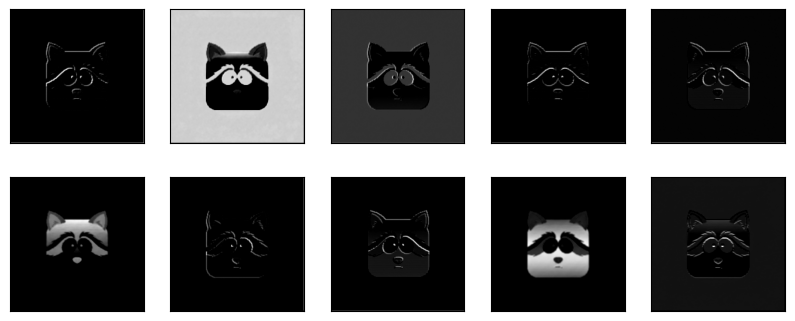

In [13]:
# Lets look at first 10 featuremaps

plt.figure( figsize=(10,4))
for i in range(10):
  ax = plt.subplot(2, 5, i + 1)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.imshow(features[0, :, :, i], cmap = "gray")
plt.show()